In [211]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean, pdist, squareform

SEED = 10

In [5]:
final_path = "./dataset/df_final_with_additional_info.csv"

In [6]:
df_final = pd.read_csv(final_path)

In [7]:
df_final

,day,day_number,month,daytime,hour,title,duration,duration_with_advertising,channel,year,genres,rating,advertising,duration_mean,duration_with_advertising_mean,number_movies
0,Martedì,25,gennaio,notte,01:10,match point,124,125,Sky Cinema Due,2005,"Drama,Romance,Thriller",7.6,1,117.508197,125.819672,61
1,Lunedì,24,gennaio,notte,01:10,the blind side,129,130,Sky Cinema Due,2009,"Biography,Drama,Sport",7.6,1,117.508197,125.819672,61
2,Giovedì,20,gennaio,pomeriggio,13:35,la leggenda del pianista sull'oceano,169,170,Sky Cinema Due,1998,"Drama,Music,Romance",8.1,1,117.508197,125.819672,61
3,Sabato,29,gennaio,notte,04:10,il profeta,100,155,Sky Cinema Due,1968,Comedy,6.1,55,117.508197,125.819672,61
4,Mercoledì,5,gennaio,sera,23:05,michael clayton,119,125,Sky Cinema Due,2007,"Crime,Drama,Mystery",7.2,6,117.508197,125.819672,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,Venerdì,20,maggio,sera,21:20,spogliando valeria,92,110,Cielo,1989,"Romance,Thriller",4.5,18,87.166667,105.416667,12
5721,Martedì,24,maggio,sera,23:00,spogliando valeria,92,110,Cielo,1989,"Romance,Thriller",4.5,18,87.166667,105.416667,12
5722,Sabato,21,maggio,sera,21:20,la nipote,92,105,Cielo,1974,Comedy,4.8,13,87.166667,105.416667,12
5723,Mercoledì,25,maggio,sera,23:05,la nipote,92,110,Cielo,1974,Comedy,4.8,18,87.166667,105.416667,12


In [9]:
df = df_final[['day', 'day_number', 'month', 'daytime', 'title', 'duration', 'duration_with_advertising', 'year', 'genres', 'rating', 'advertising']]

In [10]:
df_categorical = df_final[['day', 'month', 'daytime', 'title', 'genres']]

In [11]:
df_numerical = df_final[['day_number', 'duration', 'duration_with_advertising', 'year', 'rating', 'advertising']]

In [70]:
scaler = StandardScaler()
numerical_normalized = scaler.fit_transform(df_numerical.values)
df_numerical_normlized = pd.DataFrame(numerical_normalized, columns=df_numerical.columns)

In [71]:
df_numerical_normlized

,day_number,duration,duration_with_advertising,year,rating,advertising
0,1.066259,0.921099,0.186367,0.888432,1.194518,-0.860765
1,0.953031,1.180647,0.414133,1.130029,1.194518,-0.860765
2,0.500120,3.257031,2.236265,0.465638,1.642435,-0.860765
3,1.519170,-0.324732,1.552965,-1.346337,-0.149233,2.543686
4,-1.198296,0.661551,0.186367,1.009230,0.836184,-0.545538
...,...,...,...,...,...,...
5720,0.500120,-0.740009,-0.496933,-0.077954,-1.582566,0.211007
5721,0.953031,-0.740009,-0.496933,-0.077954,-1.582566,0.211007
5722,0.613348,-0.740009,-0.724699,-0.983942,-1.313816,-0.104220
5723,1.066259,-0.740009,-0.496933,-0.983942,-1.313816,0.211007


In [14]:
shape = df_final.shape[0]
shape

5725

In [15]:
dissM_days = np.zeros((shape, shape))
dissM_months = np.zeros((shape, shape))
dissM_daytimes = np.zeros((shape, shape))
dissM_titles = np.zeros((shape, shape))
dissM_genres = np.zeros((shape, shape))

dissM_day_numbers = np.zeros((shape, shape))
dissM_durations = np.zeros((shape, shape))
dissM_durations_with_advertising = np.zeros((shape, shape))
dissM_genres = np.zeros((shape, shape))
dissM_years = np.zeros((shape, shape))
dissM_ratings = np.zeros((shape, shape))
dissM_advertising = np.zeros((shape, shape))

In [20]:
def similarity_func(u, v):
    return 1/(1+euclidean(u,v))

DF_var = pd.DataFrame.from_dict({"s1":[1.2,3.4,10.2],"s2":[1.4,3.1,10.7],"s3":[2.1,3.7,11.3],"s4":[1.5,3.2,10.9]})
DF_var.index = ["g1","g2","g3"]

dists = pdist(DF_var, similarity_func)
DF_euclid = pd.DataFrame(squareform(dists), columns=DF_var.index, index=DF_var.index)

In [187]:
def customized_jaccard_distance(s1: np.ndarray, s2: np.ndarray):
    """
    It is used 's1[0]' because in input we have a NumPy array,
    so we are retrieving the string inside it.

    Since the genres are separated by commas ',' we are 
    using 'split' to get a list with the genres strings.
    """
    union = set(s1[0].split(",")).union(set(s2[0].split(",")))
    intersection = set(s1[0].split(",")).intersection(set(s2[0].split(",")))

    return 1 - len(intersection) / len(union)

In [188]:
def compute_dissimilarity(pd_matrix: pd.DataFrame, metric):
    distances = pdist(pd_matrix, metric)

    # Convert the 'distances' array into a nxm matrix 
    return squareform(distances)

In [199]:
df_numerical_normlized.columns

Index(['day_number', 'duration', 'duration_with_advertising', 'year', 'rating',
       'advertising'],
      dtype='object')

In [200]:
# dissM_days = 
# dissM_months = 
# dissM_daytimes = np.zeros((shape, shape))
# dissM_titles = np.zeros((shape, shape))
dissM_genres = compute_dissimilarity(df_categorical['genres'].to_frame(), customized_jaccard_distance)

dissM_day_numbers = compute_dissimilarity(df_numerical_normlized['day_number'].to_frame(), "euclidean")
dissM_durations = compute_dissimilarity(df_numerical_normlized['duration'].to_frame(), "euclidean")
dissM_durations_with_advertising = compute_dissimilarity(df_numerical_normlized['duration_with_advertising'].to_frame(), "euclidean")
dissM_years = compute_dissimilarity(df_numerical_normlized['year'].to_frame(), "euclidean")
dissM_ratings = compute_dissimilarity(df_numerical_normlized['rating'].to_frame(), "euclidean")
dissM_advertising = compute_dissimilarity(df_numerical_normlized['advertising'].to_frame(), "euclidean")

Saved the genres dissimilarity matrix to file so we don't need to re-compute it every time.

In [207]:
# with open('./dataset/MDS/dissM_genres.npy', 'wb') as f:
#     np.save(f, dissM_genres)

In [208]:
with open('./dataset/MDS/dissM_genres.npy', 'rb') as f:
    dissM_genres = np.load(f)

In [213]:
dissM = dissM_genres + dissM_day_numbers + dissM_durations + dissM_durations_with_advertising + dissM_years + dissM_ratings + dissM_advertising

In [218]:
mds = manifold.MDS(n_components=2, max_iter=300, eps=1e-3, dissimilarity="precomputed", random_state=SEED)

In [219]:
pos = mds.fit(dissM).embedding_

MDS time: 25min

In [71]:
titles = df_categorical['title'].values

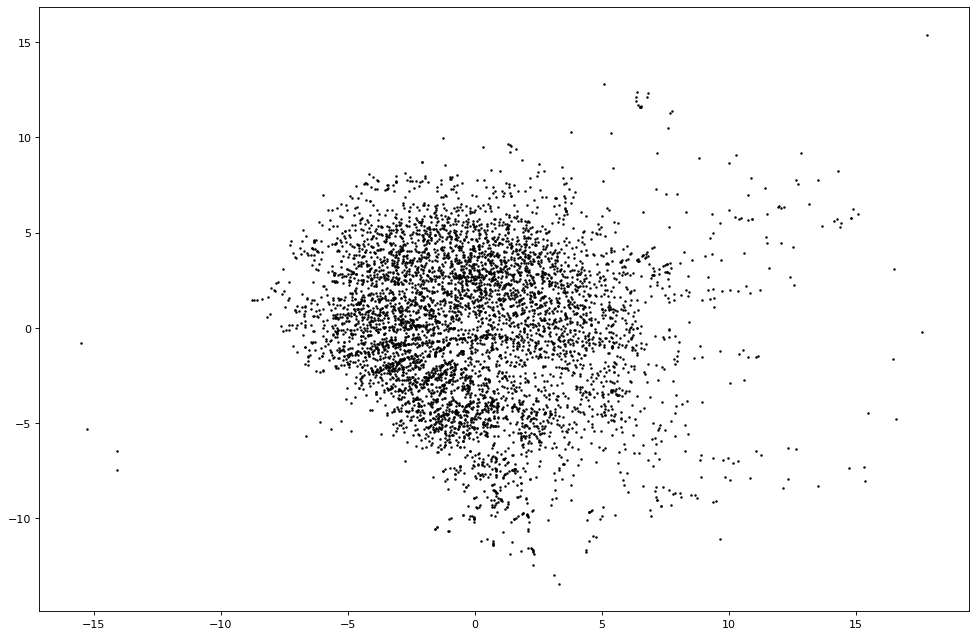

In [220]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

plt.scatter(pos[:,0], pos[:,1], color='black',s=5, lw=0)
plt.show()